In [1]:
import pandas as pd
import numpy as np
from PIL import Image 
import matplotlib.pylab as plt
import cv2

%matplotlib inline

In [2]:
contour_path = "inputs/train_contours/{}_contour.png"
df_train = pd.read_csv('inputs/train_masks.csv')
ids_train = df_train['img'].map(lambda s: s.split('.')[0])

In [3]:
def image_numerical_info(path, input_size):
    contour = np.array(Image.open(path.format(id)).convert('L'))   
    contour = cv2.resize(contour, (input_size, input_size), interpolation=cv2.INTER_LINEAR)
    num_pixs = contour.shape[0] * contour.shape[1]
    num_forground_pixs = np.count_nonzero(contour)
    num_background_pixs = num_pixs - num_forground_pixs
    for_back_ratio = np.round(np.float(num_background_pixs) / num_forground_pixs)
    
    return (num_pixs, num_forground_pixs, num_background_pixs, for_back_ratio)
    

In [5]:
sum_ratio = 0
num_imgs = 1
for id in ids_train.values:
    _, _, _, for_back_ratio = image_numerical_info(contour_path.format(id), 128)
    sum_ratio += for_back_ratio
        
    #print num_pixs, num_forground_pixs, num_background_pixs, for_back_ratio
    #assert(num_pixs == num_forground_pixs + num_background_pixs)
    
    if num_imgs%2000==0:
        print "{}/{}".format(num_imgs, len(ids_train))
    num_imgs += 1
    
print (sum_ratio / len(ids_train))
print 'Done'

2000/5088
4000/5088
44.1717767296
Done


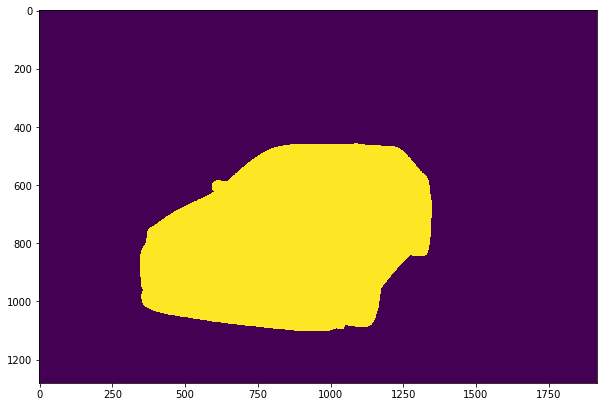

In [24]:
plt.figure(figsize=(10, 10))
plt.imshow(np.squeeze(mask))